# Analysis of transcriptomic changes during Mz19 development: GO terms (Figure 6)

In [5]:
from __future__ import division
import sys
import random
import copy
import math
import json

import numpy as np
import pandas as pd
import scipy

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

import seaborn as sns

sys.path.append("../resources/")
import sct
reload(sct)

sns.set_style("ticks")
sns.set_context("talk")

output_dir = "out/"
output_suffix = ""
output_formats = [".png", ".pdf"]

def save_figure(fig, name):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format)
    return None

mpl.rc('savefig', dpi=300)

pd.options.mode.chained_assignment = None  # default='warn'

# Load GO result

In [6]:
def load_Flymine(infile):
    terms = []
    pvalues = []
    num_genes = []
    with open(infile) as f:
        for line in f:
            term = line.rstrip().split("\t")[0].decode('utf-8')
            pvalue = float(line.rstrip().split("\t")[1])
            n = len(line.rstrip().split("\t")[2].split(","))
            terms.append(term)
            pvalues.append(pvalue)
            num_genes.append(n)
    df = pd.DataFrame({"term":terms, "pvalue": pvalues, "num_genes": num_genes})
    df.sort_values("pvalue", inplace=True, ascending=True)
    return df

In [7]:
GO_24hAPF = load_Flymine("../data/GO_Flymine_genes_DE_24hAPF_adult_24hAPFHigh.tsv")
GO_adult = load_Flymine("../data/GO_Flymine_genes_DE_24hAPF_adult_adultHigh.tsv")

In [8]:
# hack to fix unicode issue
GO_24hAPF.term.loc[0] = "cell development"
GO_adult.term.loc[0] = "ATP metabolic process"

In [9]:
# Check number of terms with P value < threshold
GO_24hAPF.loc[GO_24hAPF["pvalue"] < 1e-5].shape

(97, 3)

# Plot P values and number of genes of top hits

In [10]:
# Note that these plots have not been pruned using a tool to cut the GO ontology at a particular level
# Thus, the plots are different than those in the paper.

In [11]:
num_hits = 30

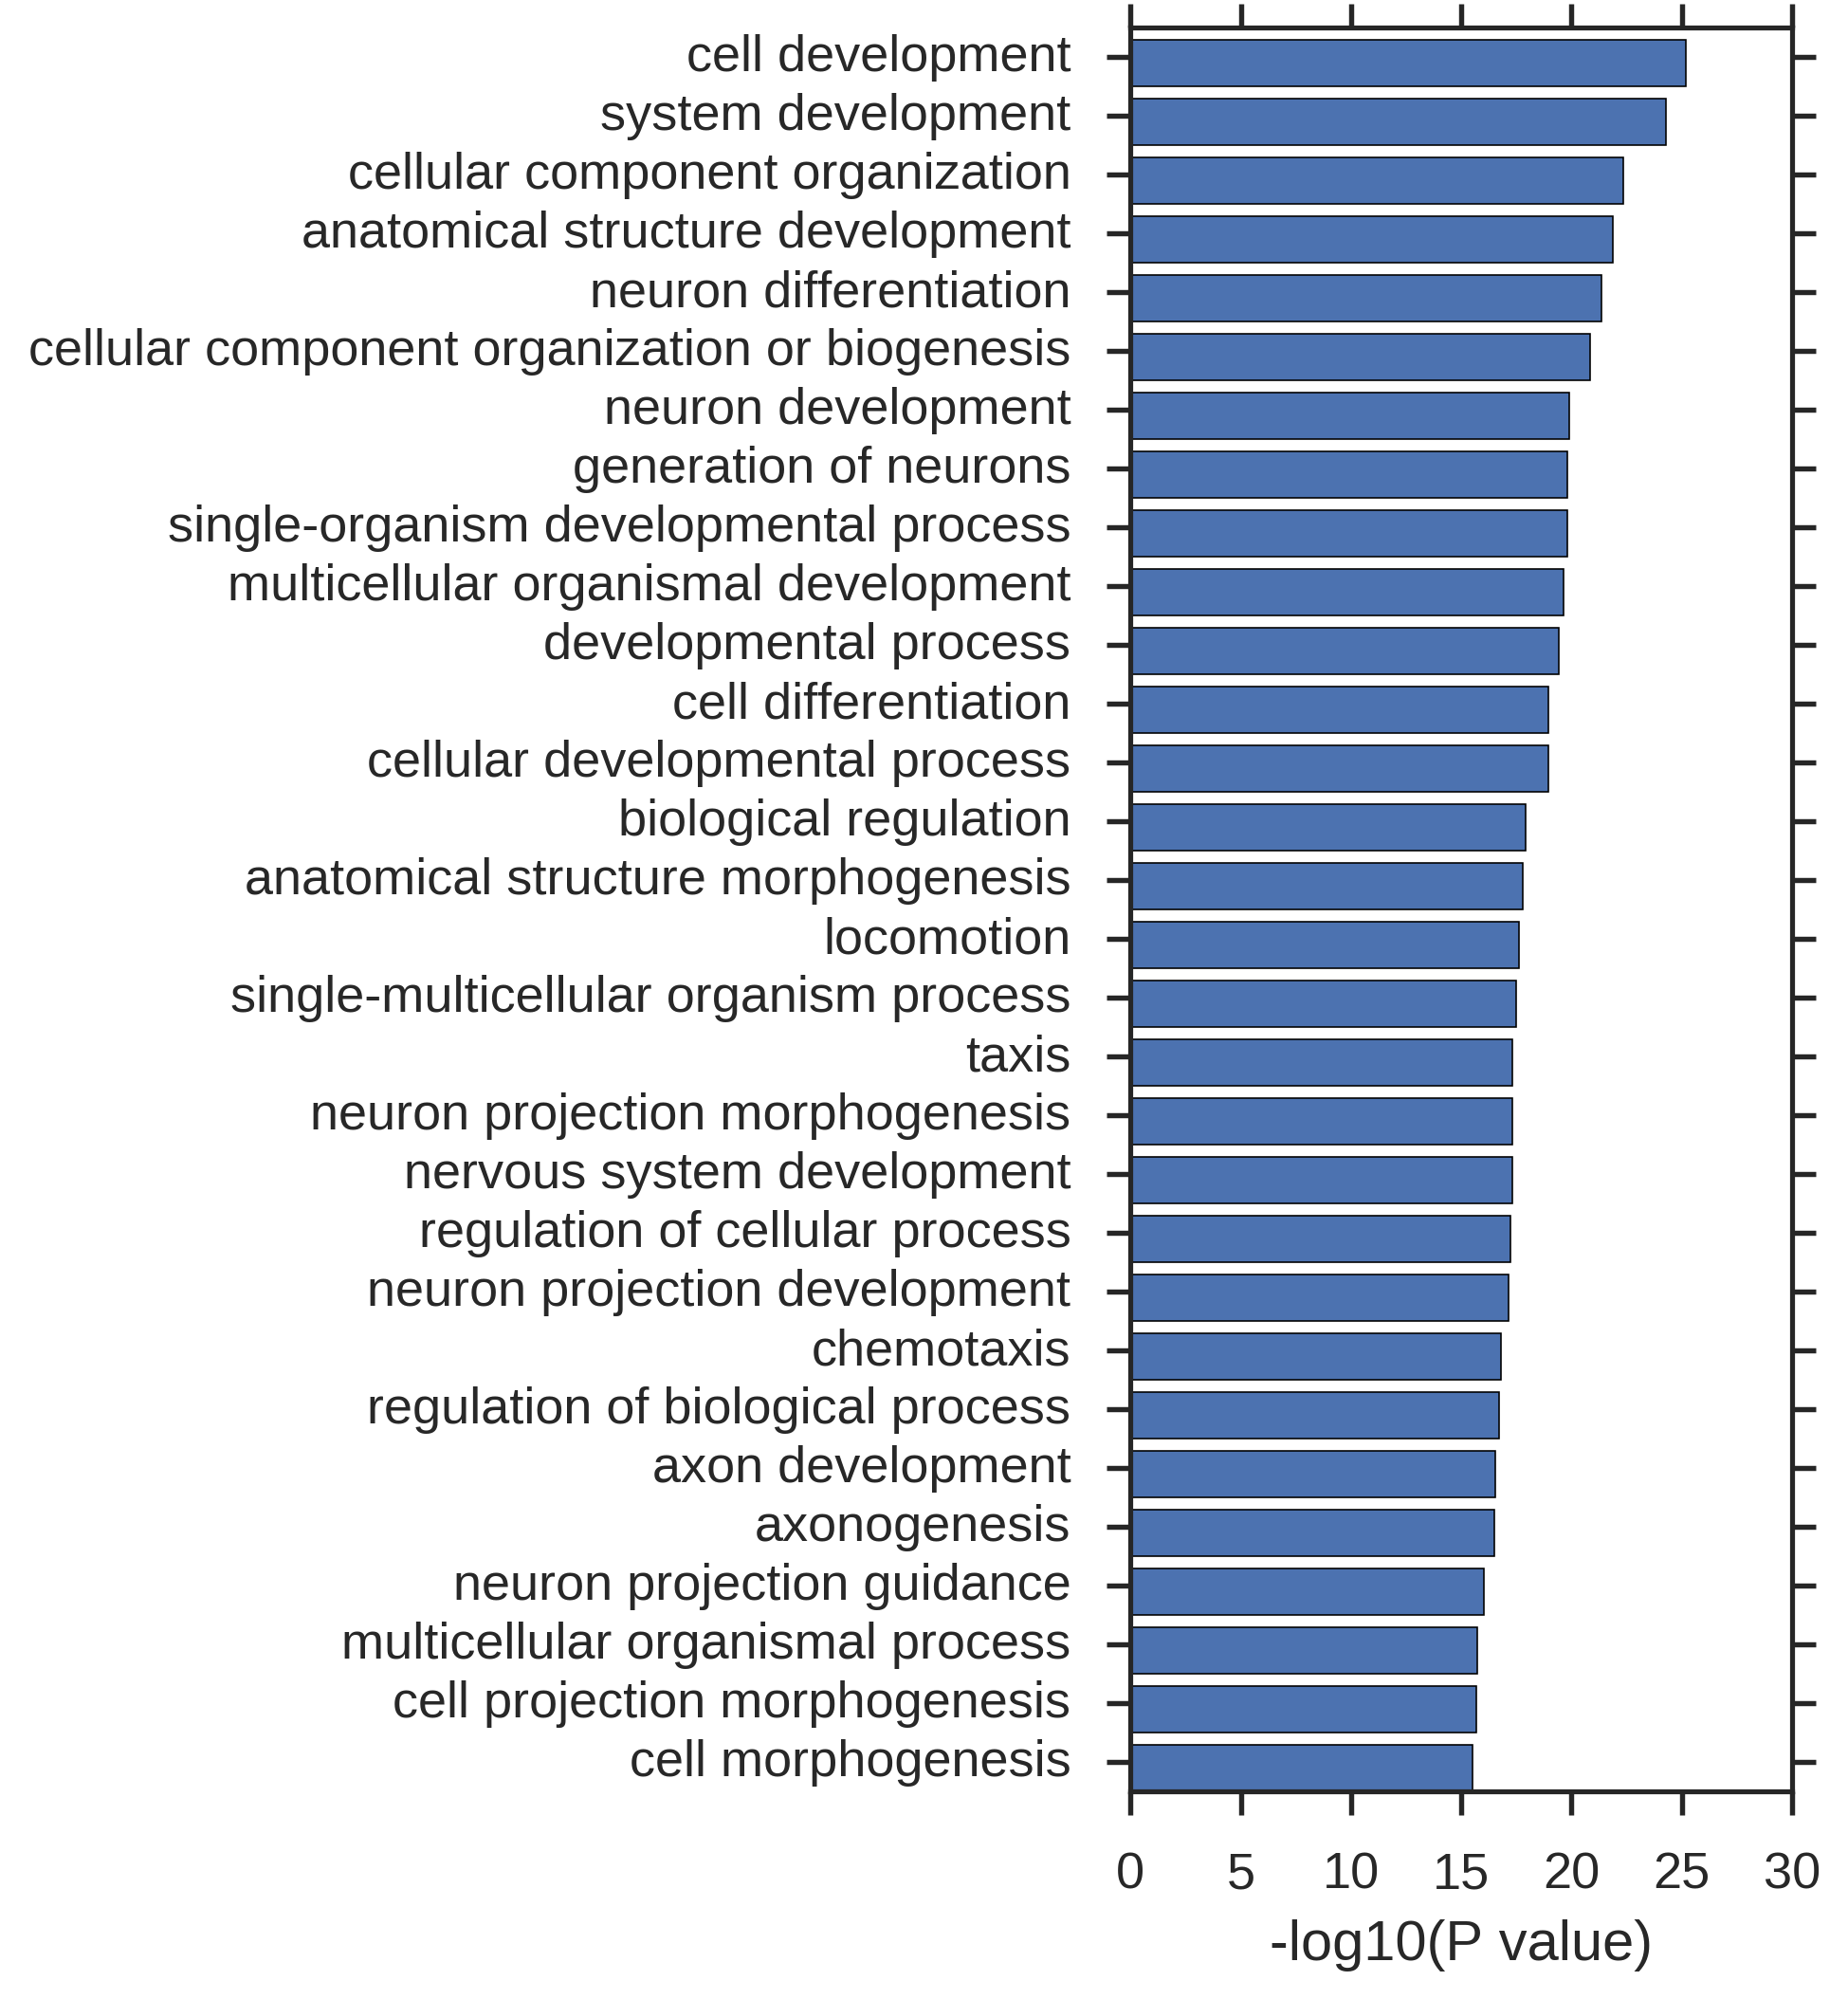

In [12]:
# P values, 24h
myData = GO_24hAPF.head(n=num_hits)[::-1]
x = np.array(range(myData.shape[0]))
y = -np.log10(myData["pvalue"])
xticklabels = list(myData["term"])

fig, ax = plt.subplots(1, 1, figsize=(3,8))
ax.barh(x, y)
ax.set_yticks(x+0.5)
ax.set_yticklabels(xticklabels)
ax.set_xlabel("-log10(P value)")

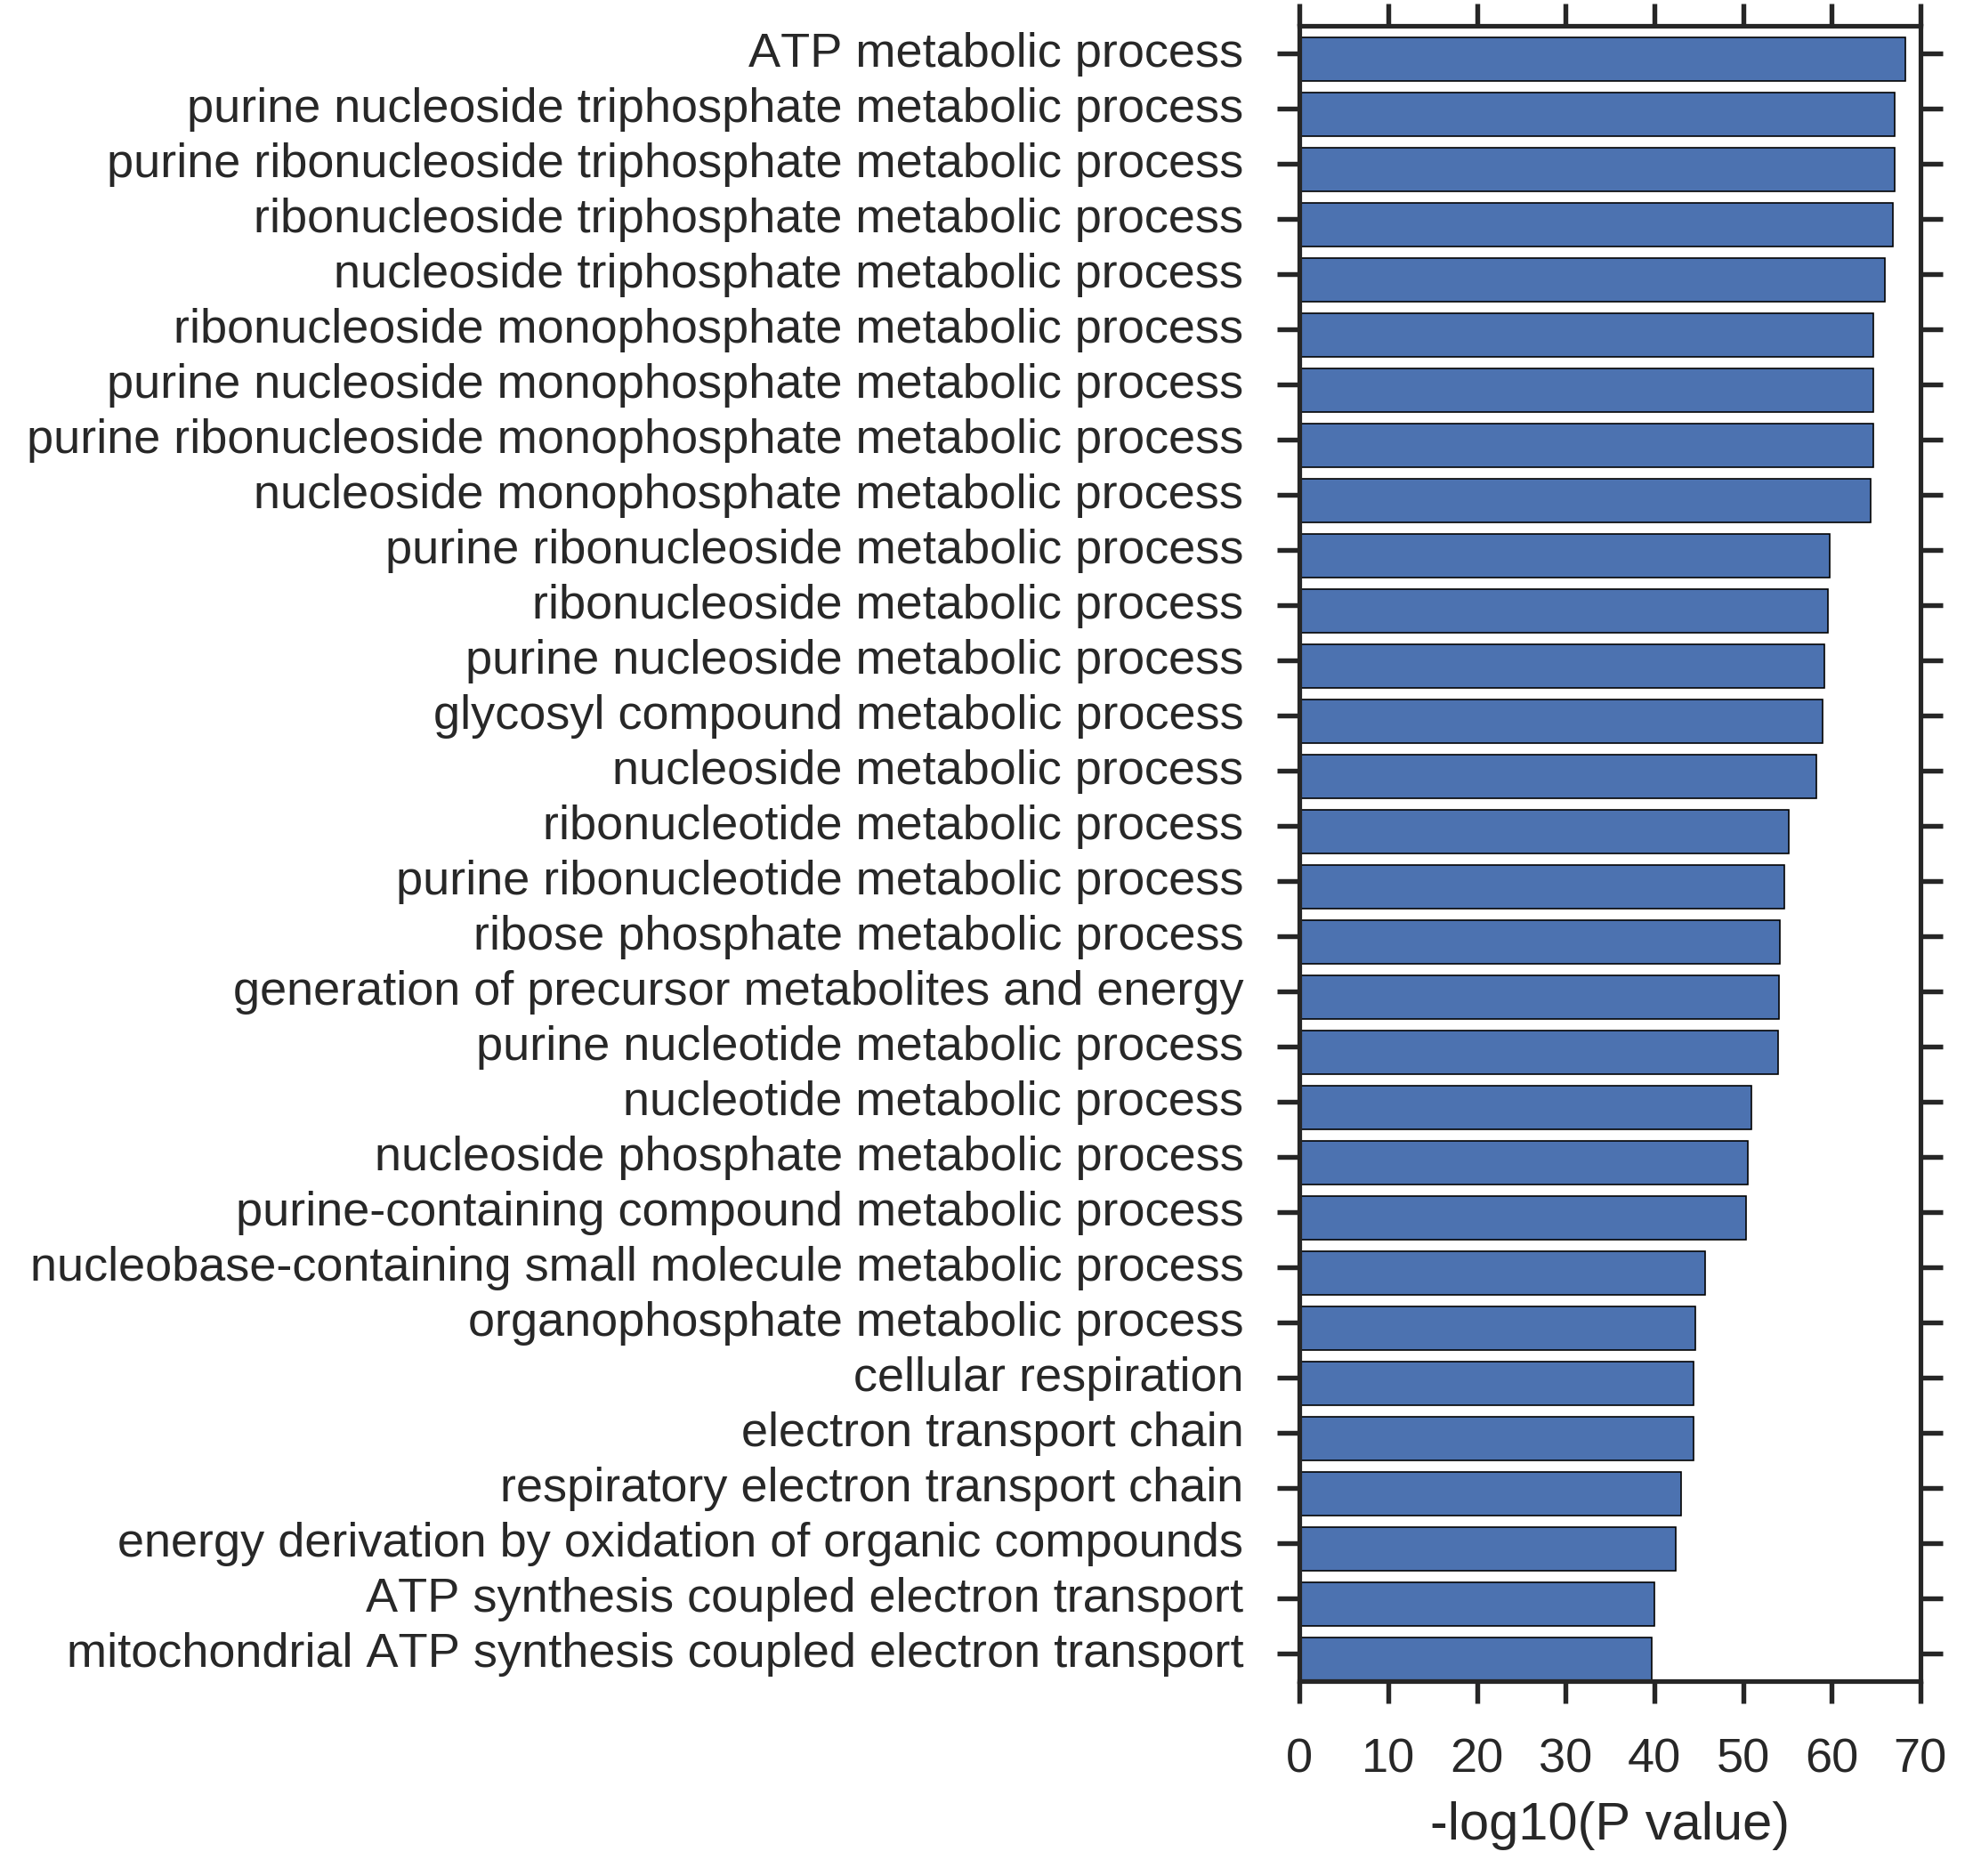

In [13]:
# P values, adult
myData = GO_adult.head(n=num_hits)[::-1]
x = np.array(range(myData.shape[0]))
y = -np.log10(myData["pvalue"])
xticklabels = list(myData["term"])

fig, ax = plt.subplots(1, 1, figsize=(3,8))
ax.barh(x, y)
ax.set_yticks(x+0.5)
ax.set_yticklabels(xticklabels)
ax.set_xlabel("-log10(P value)")

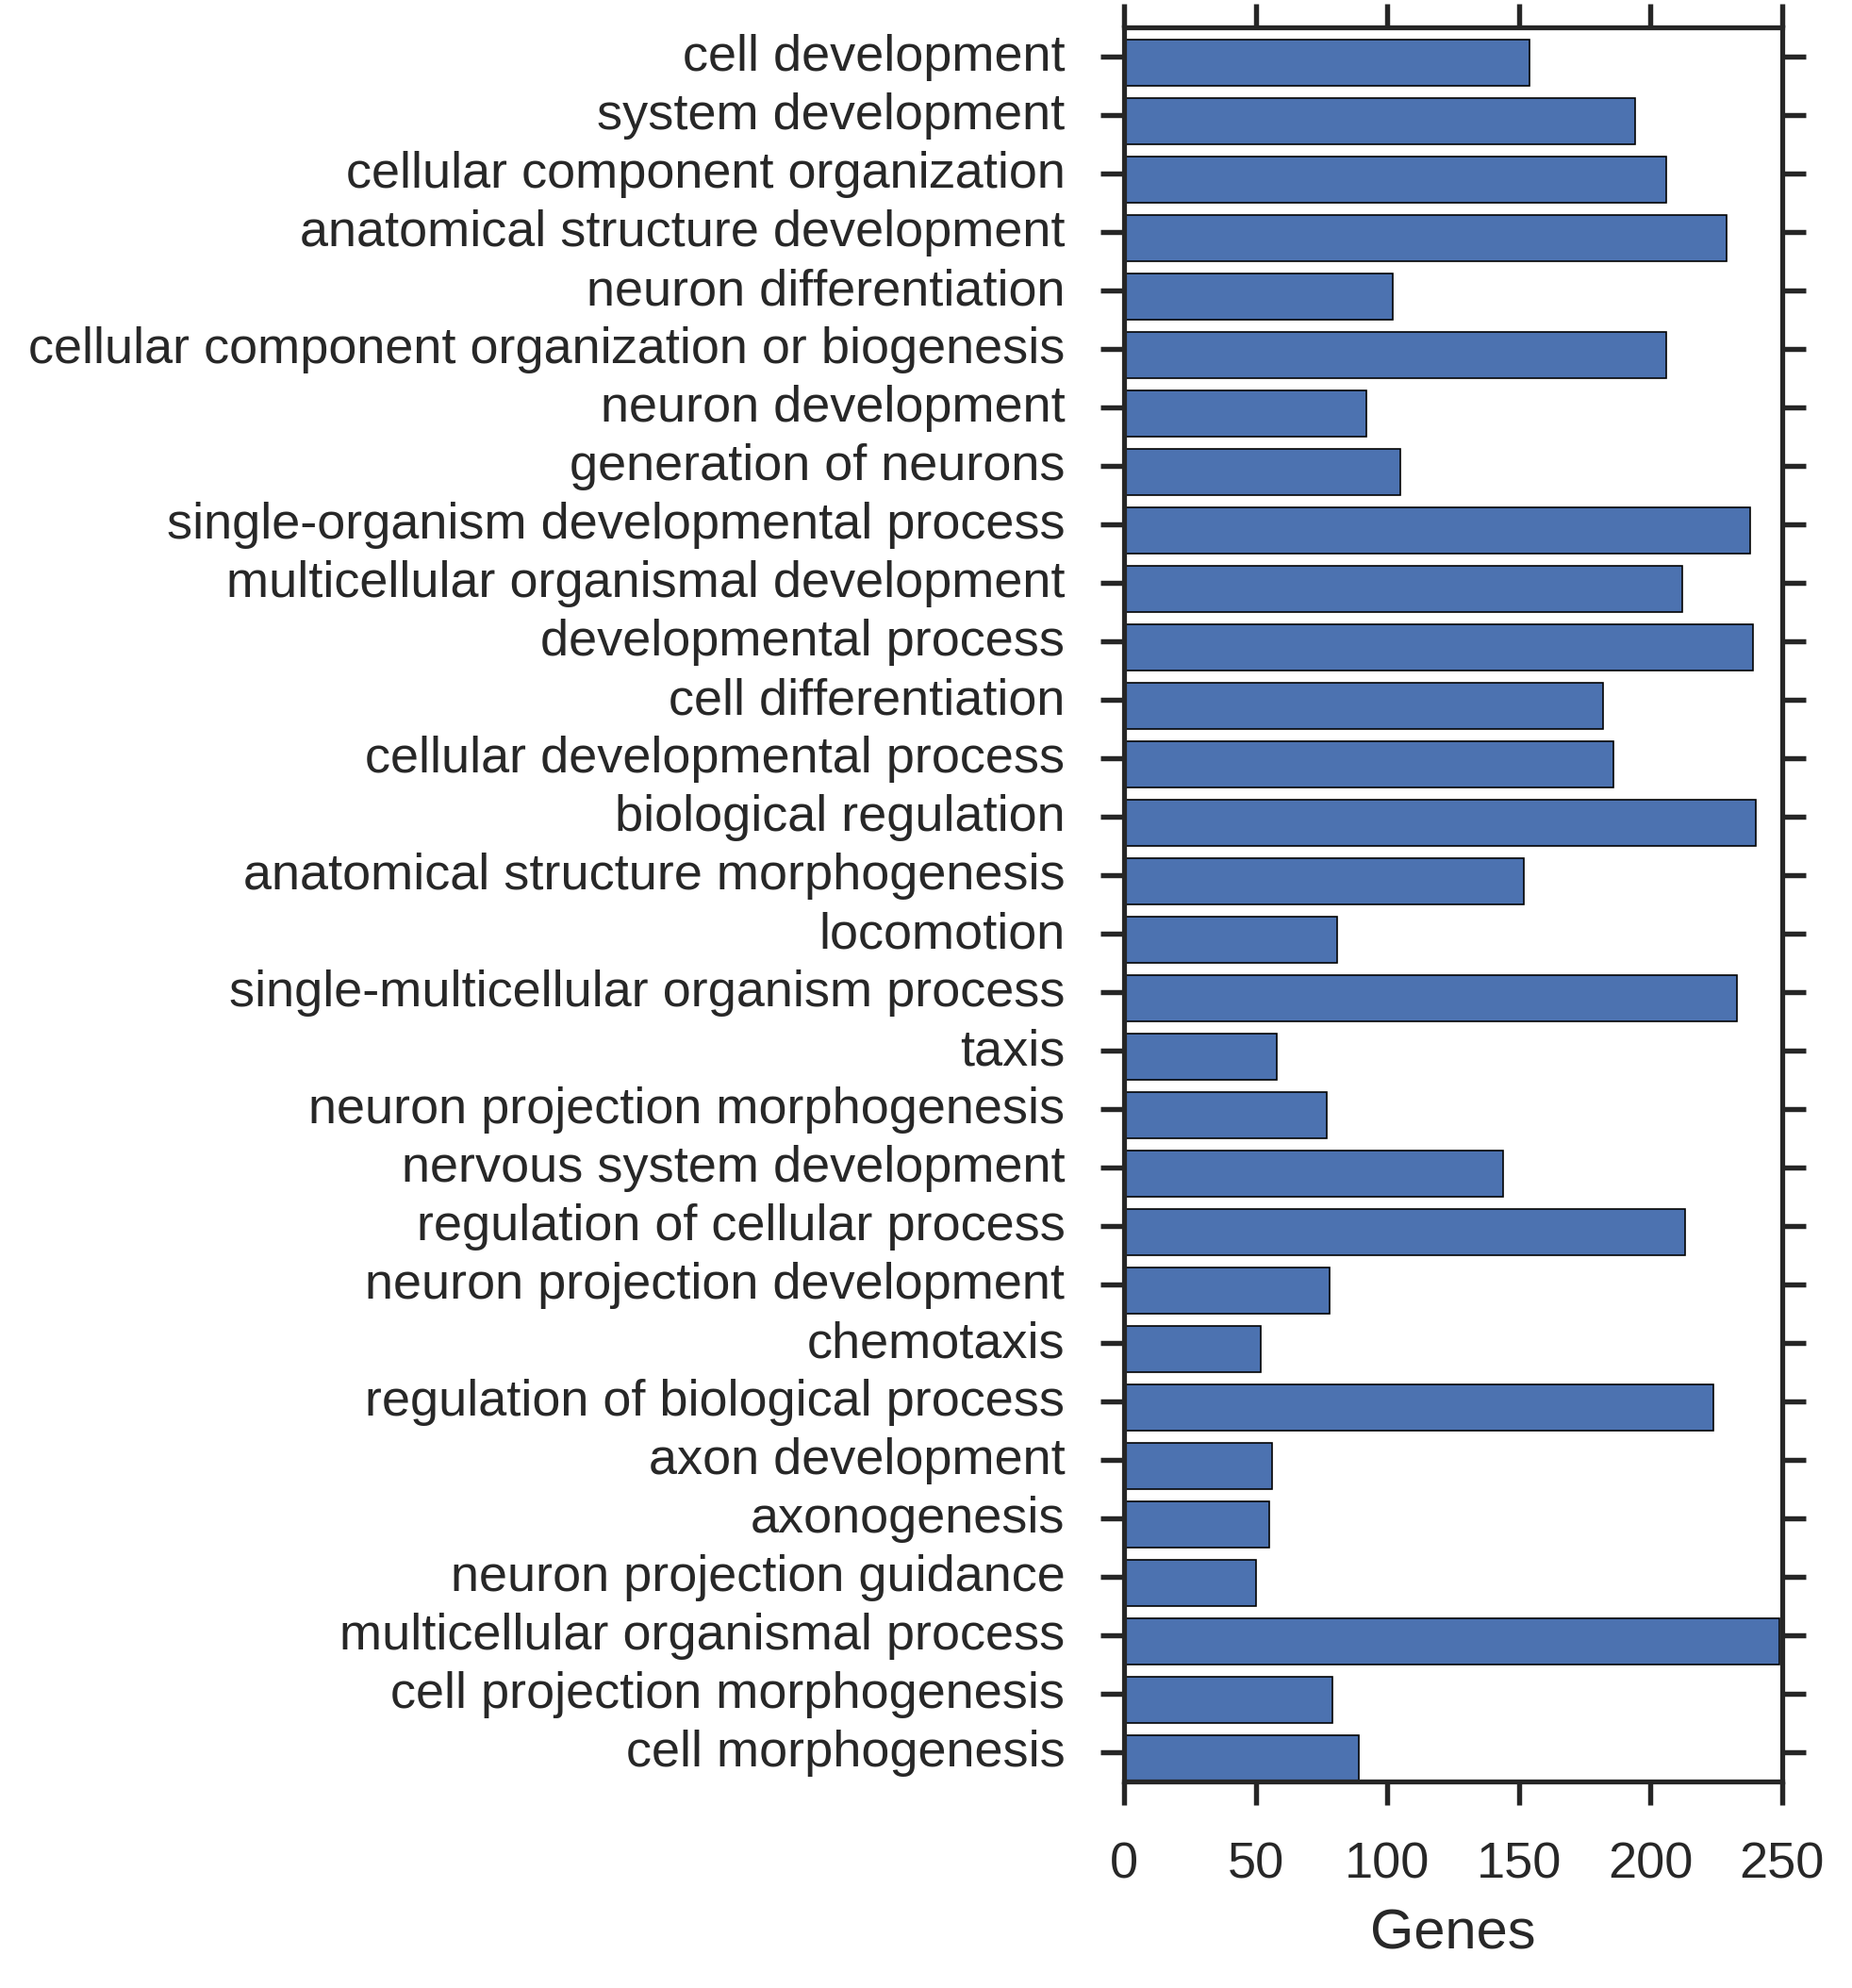

In [14]:
# number of genes, 24h
myData = GO_24hAPF.head(n=num_hits)[::-1]
x = np.array(range(myData.shape[0]))
y = myData["num_genes"]
xticklabels = list(myData["term"])

fig, ax = plt.subplots(1, 1, figsize=(3,8))
ax.barh(x, y)
ax.set_yticks(x+0.5)
ax.set_yticklabels(xticklabels)
ax.set_xlabel("Genes")

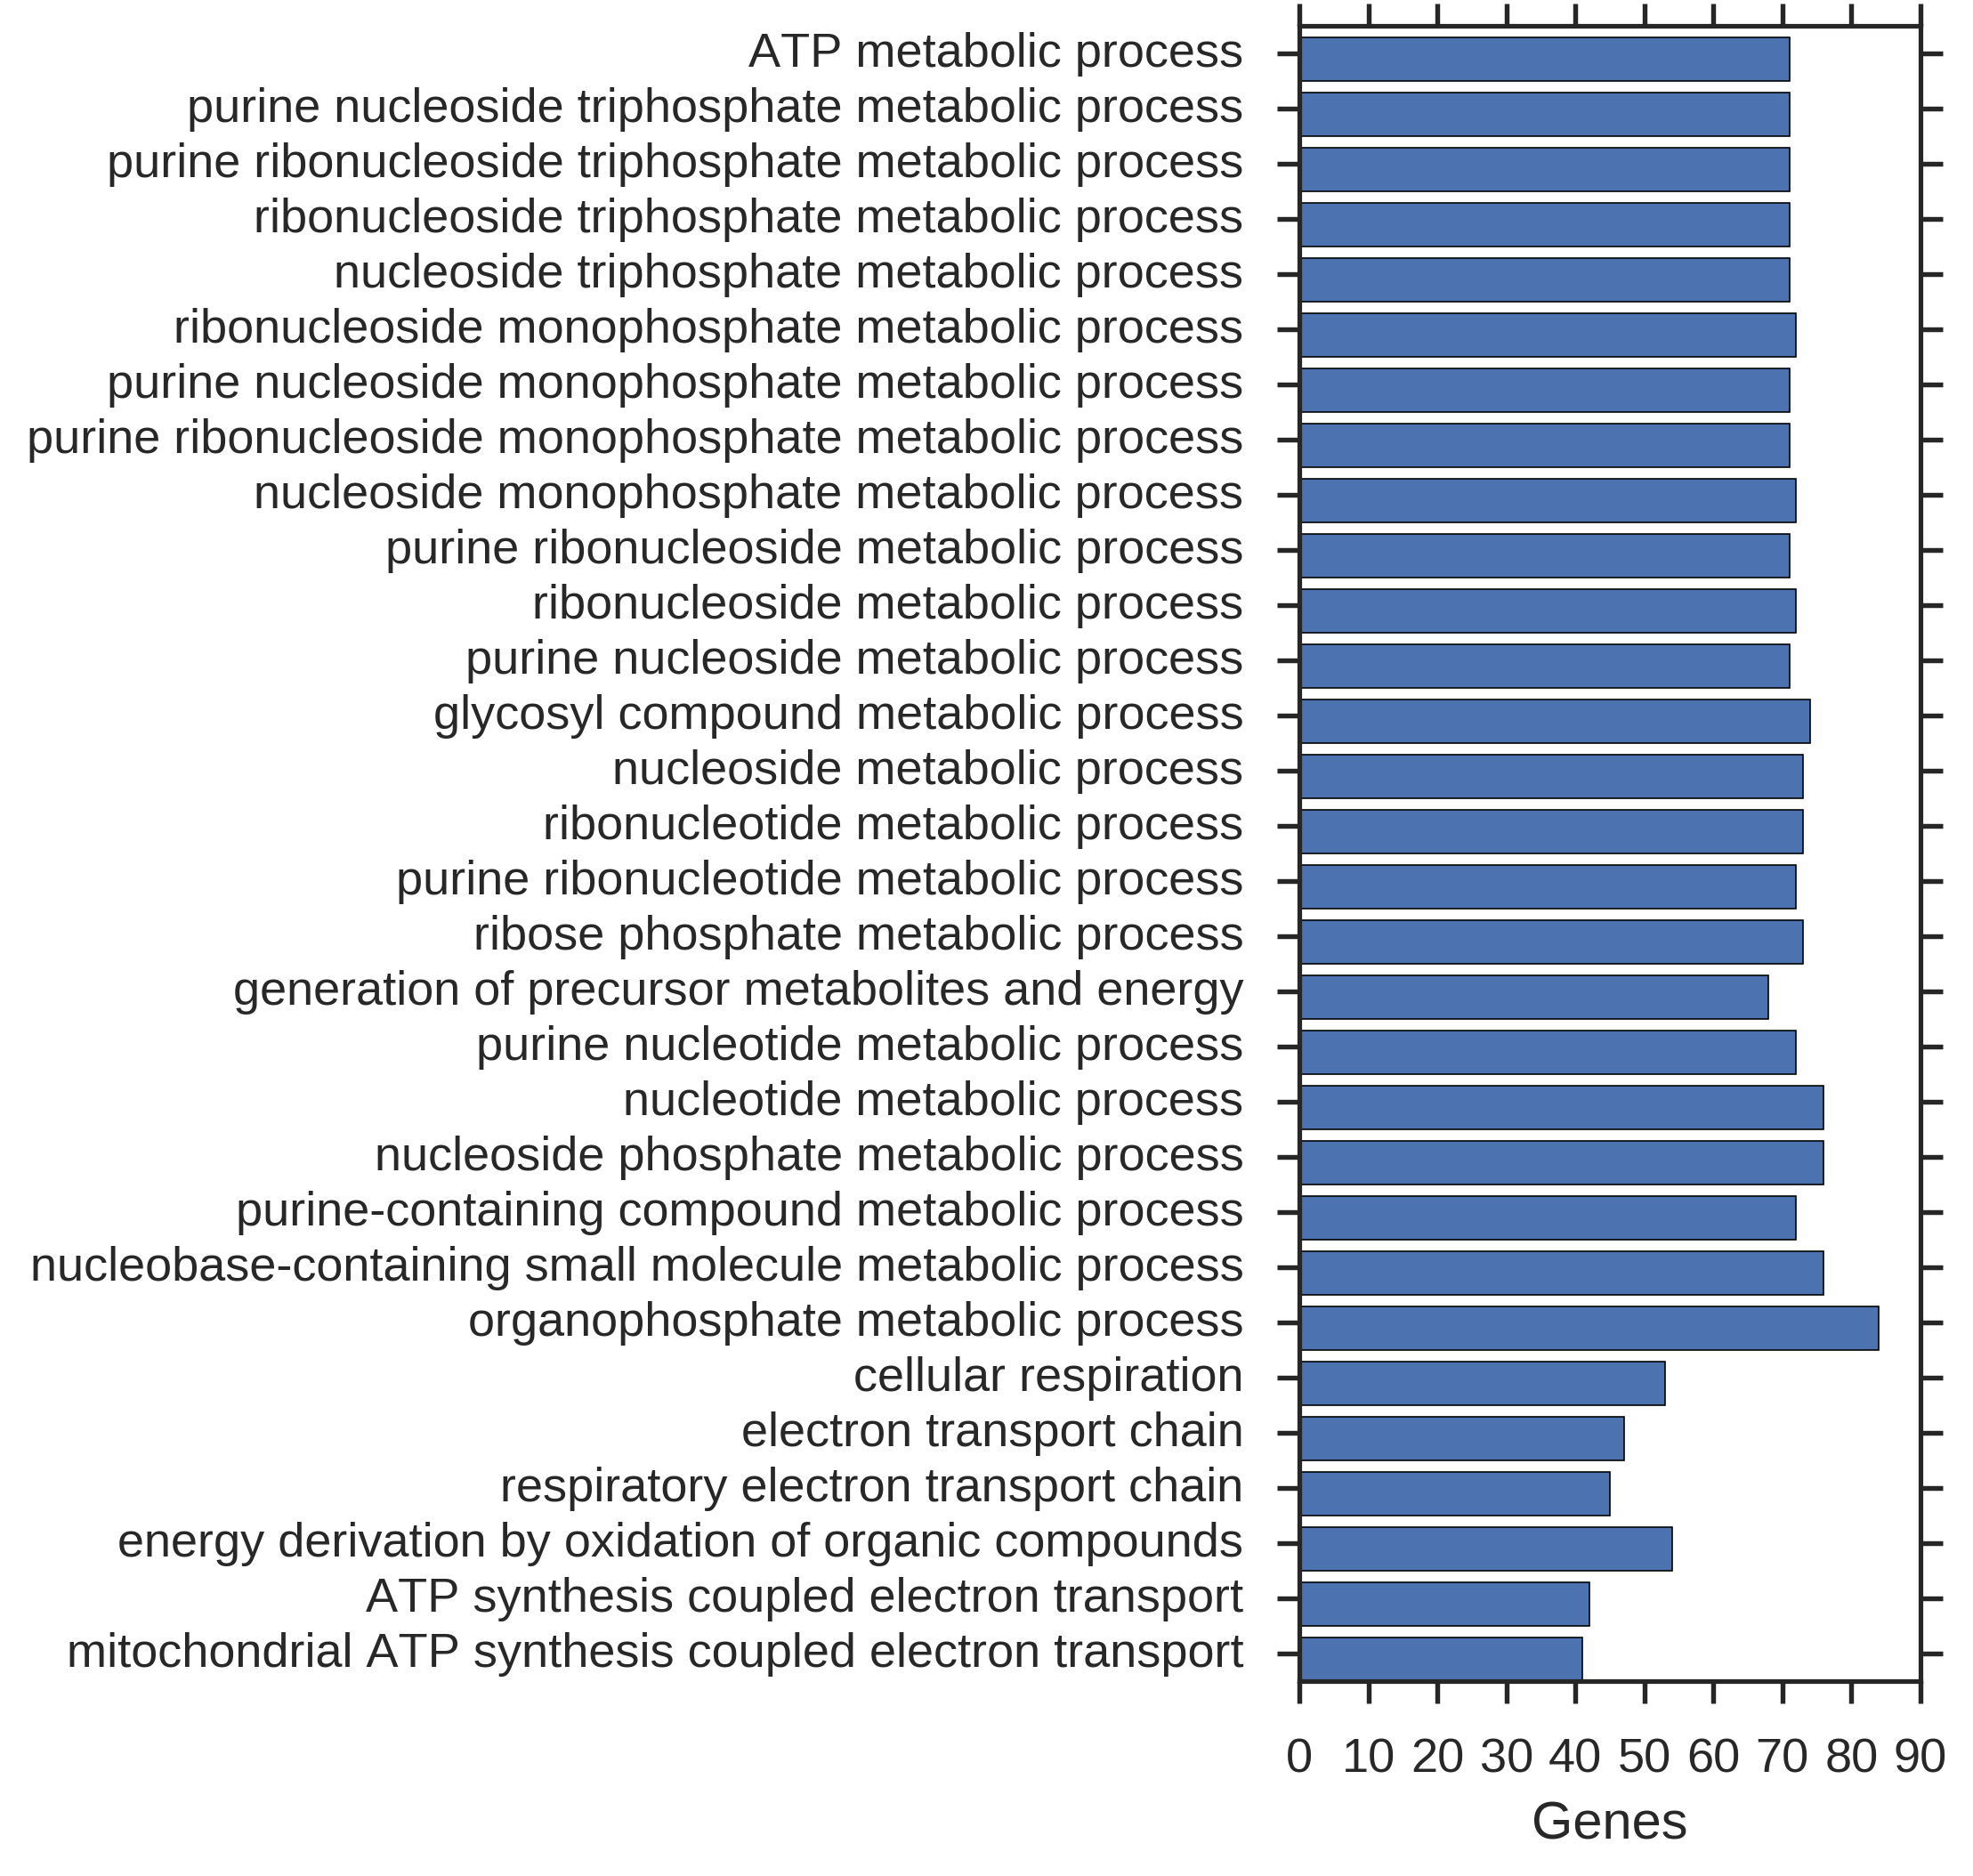

In [15]:
# number of genes, adult
myData = GO_adult.head(n=num_hits)[::-1]
x = np.array(range(myData.shape[0]))
y = myData["num_genes"]
xticklabels = list(myData["term"])

fig, ax = plt.subplots(1, 1, figsize=(3,8))
ax.barh(x, y)
ax.set_yticks(x+0.5)
ax.set_yticklabels(xticklabels)
ax.set_xlabel("Genes")